In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set_context('talk')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
# paths to raw data from sra
# ec1 is ecoli from 2015-2016, ec2 from 2016-2017, etc. until 2023 (July)
# for kpneumoniae and paeruginosa I could download all the metadata in one from 2016-2023 (July)
ec1 = '/home/burgaya/Downloads/SraRunTable(2).txt'
ec2 = '/home/burgaya/Downloads/SraRunTable(3).txt'
ec3 = '/home/burgaya/Downloads/SraRunTable(4).txt'
ec4 = '/home/burgaya/Downloads/SraRunTable(5).txt'
ec5 = '/home/burgaya/Downloads/SraRunTable(6).txt'
ec6 = '/home/burgaya/Downloads/SraRunTable(7).txt'
ec7 = '/home/burgaya/Downloads/SraRunTable(8).txt'
ec8 = '/home/burgaya/Downloads/SraRunTable(9).txt'
kp1 = '/home/burgaya/Downloads/SraRunTable(12).txt'
pa1 = '/home/burgaya/Downloads/SraRunTable(11).txt'

In [4]:
# load df
ec_1 = pd.read_csv(ec1, sep=',')
ec_2 = pd.read_csv(ec2, sep=',')
ec_3 = pd.read_csv(ec3, sep=',')
ec_4 = pd.read_csv(ec4, sep=',')
ec_5 = pd.read_csv(ec5, sep=',')
ec_6 = pd.read_csv(ec6, sep=',')
ec_7 = pd.read_csv(ec7, sep=',')
ec_8 = pd.read_csv(ec8, sep=',')
kp = pd.read_csv(kp1, sep=',')
pa = pd.read_csv(pa1, sep=',')

/home/burgaya/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (65,69,70,71,75,79,83,84,91,92,97,98,99,101,103,111,112,113,115,116,120,121,122,123,124,125,126,127,128,129,130,133,138,139,140,141,142,143,145,146) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/burgaya/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (59,61,64,65,66,68,69,72,73,74,75,76,77,78,79,80,81,84,85,86,87,88,89,90,91,92,93,94,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,122,123,124,125,126,127,128,129,130,131,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/burgaya/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (55,68,77,90,91,93,95,96

In [5]:
# merge ec df
# some df have less columns than others
concat = [ec_1, ec_2, ec_3, ec_4, ec_5, ec_6, ec_7, ec_8]
ec = pd.concat(concat, axis=0, ignore_index=True)

In [6]:
ec.shape

(173883, 378)

In [7]:
kp.shape

(38864, 147)

In [8]:
pa.shape

(25295, 147)

In [9]:
ec.info

<bound method DataFrame.info of                 Run Assay Type  AvgSpotLen        Bases   BioProject  \
0        SRR1781795        WGS       464.0  446137476.0  PRJNA273259   
1        SRR1783841        WGS       281.0  461332090.0  PRJNA273275   
2        SRR1783842        WGS       218.0  819151878.0  PRJNA273275   
3        SRR1783843        WGS       281.0  495181031.0  PRJNA273275   
4        SRR1783844        WGS       209.0  445452472.0  PRJNA273275   
...             ...        ...         ...          ...          ...   
173878  ERR10176488        WGS       297.0  492647041.0   PRJEB55855   
173879  ERR10176491        WGS       297.0  642571567.0   PRJEB55855   
173880  ERR10176498        WGS       297.0  540794367.0   PRJEB55855   
173881  ERR10176587        WGS       297.0  309052633.0   PRJEB55855   
173882  ERR10176971        WGS       298.0  763672097.0   PRJEB55855   

             BioSample        Bytes                      Center Name Consent  \
0         SAMN03322683 

In [10]:
# missing values
ec.isnull().sum().tail(50)

No.                                       173724
finishing_strategy                        173762
human_associated_environmental_package    173762
culture_time                              173782
Reactor                                   173782
host_genotype                             173787
clinical_diagnosis                        173793
latitude_and_longitude                    173805
2ndry_ID                                  173810
chem_administration                       173810
fecal_sample_number                       173810
host_infra_specific_rank                  173810
host_life_stage                           173810
UoS_isolate_ID                            173810
Instrument.1                              173814
similar_to                                173820
broad-scale_environmental_context         173821
environmental_medium                      173821
purpose_of_sampling                       172238
animal_env                                172644
platform_model      

In [11]:
# drop columns with more than 75% of missing values
threshold_ec = len(ec) * 0.75
ec_filtered = ec.dropna(axis = 1, thresh = threshold_ec)

threshold_kp = len(kp) * 0.75
kp_filtered = kp.dropna(axis = 1, thresh = threshold_kp)

threshold_pa = len(pa) * 0.75
pa_filtered = pa.dropna(axis = 1, thresh = threshold_pa)

In [12]:
ec_filtered.shape

(173883, 32)

In [13]:
kp_filtered.shape

(38864, 29)

In [14]:
pa_filtered.shape

(25295, 31)

In [15]:
ec_filtered.isnull().sum()

Run                                   0
Assay Type                            0
AvgSpotLen                          189
Bases                               189
BioProject                            1
BioSample                             0
Bytes                                13
Center Name                           0
Consent                               0
DATASTORE filetype                    0
DATASTORE provider                    0
DATASTORE region                      0
Experiment                            0
Instrument                            0
LibraryLayout                         0
LibrarySelection                      0
LibrarySource                         0
Organism                              0
Platform                              0
ReleaseDate                           0
Sample Name                           0
SRA Study                             0
create_date                         306
version                             306
Library Name                      10822


In [16]:
# filter for collection date
ec_filtered['Collection_Date'].unique()

array(['1982', 'missing', '2014-10', ..., '2022-07-25', '2022-06-28',
       '2022-05-17'], dtype=object)

In [17]:
# drop rows with NaN or 'missing' in Collection_Date
ec_filtered = ec_filtered.dropna(subset=['Collection_Date'])
ec_filtered = ec_filtered[ec_filtered.Collection_Date != 'missing']
ec_filtered = ec_filtered[ec_filtered.Collection_Date != 'nan']

kp_filtered = kp_filtered.dropna(subset=['Collection_Date'])
kp_filtered = kp_filtered[kp_filtered.Collection_Date != 'missing']
kp_filtered = kp_filtered[kp_filtered.Collection_Date != 'nan']

pa_filtered = pa_filtered.dropna(subset=['Collection_Date'])
pa_filtered = pa_filtered[pa_filtered.Collection_Date != 'missing']
pa_filtered = pa_filtered[pa_filtered.Collection_Date != 'nan']

In [18]:
pa_filtered.shape

(21803, 31)

In [19]:
# filter for country
ec_filtered['geo_loc_name_country'].unique()

array(['USA', 'uncalculated', 'Turkey', 'Spain', 'Canada',
       'United Kingdom', 'China', 'Argentina', 'South Korea', nan,
       'Belgium', 'Netherlands', 'Denmark', 'Pakistan', 'Norway',
       'Australia', 'Germany', 'Portugal', 'Sweden', 'France', 'India',
       'Israel', 'Thailand', 'Liberia', 'Hungary', 'Macedonia',
       'Guinea-Bissau', 'South Africa', 'Mali', 'Russia',
       'Papua New Guinea', 'Indonesia', 'Singapore', 'New Zealand',
       'Japan', 'Switzerland', 'Tonga', 'Poland', 'Zambia', 'Bulgaria',
       'Cyprus', 'Estonia', 'Italy', 'Latvia', 'Lithuania', 'Romania',
       'Slovakia', 'Laos', 'Czech Republic', 'Serbia', 'Ireland',
       'Brazil', 'Mexico', 'Saudi Arabia', 'Puerto Rico', 'Gabon', 'Peru',
       'Finland', 'Paraguay', 'West Bank', 'Egypt', 'Ghana', 'Uganda',
       'Uruguay', 'Viet Nam', 'Colombia', 'Ecuador', 'Georgia',
       'Democratic Republic of the Congo', 'Austria', 'Croatia', 'Greece',
       'Slovenia', 'Dominican Republic', 'Bangladesh

In [20]:
# drop rows with NaN or 'uncalculated'
ec_filtered = ec_filtered.dropna(subset=['geo_loc_name_country'])
ec_filtered = ec_filtered[ec_filtered.geo_loc_name_country != 'uncalculated']
ec_filtered = ec_filtered[ec_filtered.geo_loc_name_country != 'nan']

kp_filtered = kp_filtered.dropna(subset=['geo_loc_name_country'])
kp_filtered = kp_filtered[kp_filtered.geo_loc_name_country != 'uncalculated']
kp_filtered = kp_filtered[kp_filtered.geo_loc_name_country != 'nan']

pa_filtered = pa_filtered.dropna(subset=['geo_loc_name_country'])
pa_filtered = pa_filtered[pa_filtered.geo_loc_name_country != 'uncalculated']
pa_filtered = pa_filtered[pa_filtered.geo_loc_name_country != 'nan']

In [21]:
ec_filtered.shape

(131389, 32)

In [22]:
ec_filtered.isnull().sum()

Run                                   0
Assay Type                            0
AvgSpotLen                           54
Bases                                54
BioProject                            0
BioSample                             0
Bytes                                 2
Center Name                           0
Consent                               0
DATASTORE filetype                    0
DATASTORE provider                    0
DATASTORE region                      0
Experiment                            0
Instrument                            0
LibraryLayout                         0
LibrarySelection                      0
LibrarySource                         0
Organism                              0
Platform                              0
ReleaseDate                           0
Sample Name                           0
SRA Study                             0
create_date                         200
version                             200
Library Name                       7695


In [23]:
ec_filtered.isnull().any()

Run                               False
Assay Type                        False
AvgSpotLen                         True
Bases                              True
BioProject                        False
BioSample                         False
Bytes                              True
Center Name                       False
Consent                           False
DATASTORE filetype                False
DATASTORE provider                False
DATASTORE region                  False
Experiment                        False
Instrument                        False
LibraryLayout                     False
LibrarySelection                  False
LibrarySource                     False
Organism                          False
Platform                          False
ReleaseDate                       False
Sample Name                       False
SRA Study                         False
create_date                        True
version                            True
Library Name                       True


In [24]:
# add year column 
ec_filtered['Year'] = ec_filtered['Collection_Date'].str.extract(r'^(\d{4})')
kp_filtered['Year'] = kp_filtered['Collection_Date'].str.extract(r'^(\d{4})')
pa_filtered['Year'] = pa_filtered['Collection_Date'].str.extract(r'^(\d{4})')

# add month column, having a NaN if they do not present it.
ec_filtered['Month'] = ec_filtered['Collection_Date'].str.extract(r'^(\d{4}-\d{2})')
ec_filtered.loc[ec_filtered['Collection_Date'].str.len() != 7, 'Month'] = pd.NaT
kp_filtered['Month'] = kp_filtered['Collection_Date'].str.extract(r'^(\d{4}-\d{2})')
kp_filtered.loc[kp_filtered['Collection_Date'].str.len() != 7, 'Month'] = pd.NaT
pa_filtered['Month'] = pa_filtered['Collection_Date'].str.extract(r'^(\d{4}-\d{2})')
pa_filtered.loc[pa_filtered['Collection_Date'].str.len() != 7, 'Month'] = pd.NaT

# add full date column, having a NaN if they do not present it.
ec_filtered['Date'] = pd.to_datetime(ec_filtered['Collection_Date'], errors='coerce')
ec_filtered.loc[ec_filtered['Collection_Date'].str.len() != 10, 'Date'] = pd.NaT
kp_filtered['Date'] = pd.to_datetime(kp_filtered['Collection_Date'], errors='coerce')
kp_filtered.loc[kp_filtered['Collection_Date'].str.len() != 10, 'Date'] = pd.NaT
pa_filtered['Date'] = pd.to_datetime(pa_filtered['Collection_Date'], errors='coerce')
pa_filtered.loc[pa_filtered['Collection_Date'].str.len() != 10, 'Date'] = pd.NaT

In [25]:
pa_filtered['Year'].unique()

array(['2017', '2018', '2015', '2012', '2013', '2011', '2010', '2004',
       '2014', '2020', '1991', '2019', '2016', '2008', '2006', '2021',
       '2007', nan, '1993', '1990', '2005', '2001', '2002', '2000',
       '2009', '2003', '1999', '2022', '2023', '1955', '1982', '1980',
       '1996', '1998', '1985', '1997', '1995', '1969', '1981', '1992',
       '1989', '1988', '1986', '1994', '1983', '1987', '1971', '1958',
       '1960', '1938', '1961'], dtype=object)

In [26]:
kp_filtered['Year'].unique()

array(['1998', '2016', '2015', '2004', '2018', '2017', '2010', '2013',
       '2021', '2020', '2003', '2019', '2012', '2014', '2009', nan,
       '2011', '2007', '2008', '1994', '1935', '1997', '2000', '2002',
       '2005', '1987', '1980', '1985', '1996', '2001', '2022', '2023',
       '1982', '1991', '1995', '2006', '1981', '1999', '1993', '1990',
       '0000'], dtype=object)

In [27]:
ec_filtered['Year'].unique()

array(['1982', '2014', '2015', nan, '2010', '2011', '2013', '2012',
       '2007', '2006', '2008', '1990', '1993', '1977', '2004', '2009',
       '2002', '2005', '1997', '1999', '2003', '1996', '1994', '1995',
       '1979', '1944', '1952', '1955', '1984', '1972', '1991', '1992',
       '2001', '1971', '1966', '1974', '1980', '1987', '1969', '1965',
       '1988', '1983', '1976', '1986', '1973', '1978', '1989', '2016',
       '1985', '1998', '1975', '1905', '2000', '1981', '1953', '1958',
       '0000', '2017', '1947', '1957', '2018', '1967', '1968', '1884',
       '1954', '1960', '2019', '1946', '1922', '1970', '2020', '2021',
       '1964', '1963', '1950', '2022', '1930'], dtype=object)

In [28]:
# drop rows that contains year < 2015
# 'Year' column to numeric
ec_filtered['Year'] = pd.to_numeric(ec_filtered['Year'])
kp_filtered['Year'] = pd.to_numeric(kp_filtered['Year'])
pa_filtered['Year'] = pd.to_numeric(pa_filtered['Year'])

# filter and keep rows with the desired years
years_to_keep = list(range(2015, 2024))
ec_filtered = ec_filtered[ec_filtered['Year'].isin(years_to_keep)]
kp_filtered = kp_filtered[kp_filtered['Year'].isin(years_to_keep)]
pa_filtered = pa_filtered[pa_filtered['Year'].isin(years_to_keep)]

# reset the index
ec_filtered = ec_filtered.reset_index(drop=True)
kp_filtered = kp_filtered.reset_index(drop=True)
pa_filtered = pa_filtered.reset_index(drop=True)

In [29]:
ec_filtered.shape

(88087, 35)

In [30]:
kp_filtered.shape

(24165, 32)

In [31]:
pa_filtered.shape

(14904, 34)

In [32]:
pa_filtered.Year.value_counts()

2018.0    3525
2019.0    2859
2017.0    2279
2015.0    1848
2016.0    1360
2020.0    1217
2021.0     988
2022.0     623
2023.0     205
Name: Year, dtype: int64

In [33]:
pa_filtered.geo_loc_name_country.value_counts().head(50)

USA               6898
Spain             1113
China              925
France             898
Germany            863
Australia          670
Canada             501
Singapore          498
Denmark            338
Poland             284
Pakistan           226
Serbia             187
Nigeria            142
Belgium            131
Indonesia          127
United Kingdom     120
Saudi Arabia       112
Colombia            88
Netherlands         85
Switzerland         76
Lebanon             63
Turkey              47
Paraguay            43
Thailand            42
Czech Republic      35
Hungary             33
Russia              30
Mexico              29
Estonia             28
India               26
Chile               21
Argentina           21
Bulgaria            17
Cyprus              17
Peru                15
Ghana               12
Bangladesh          12
Croatia             11
Ethiopia            10
Albania             10
Hong Kong            8
Cambodia             7
Nicaragua            7
Lithuania  

In [34]:
# drop rows that contain >50 samples per countries
# count values
value_counts_ec = ec_filtered['geo_loc_name_country'].value_counts()
value_counts_kp = kp_filtered['geo_loc_name_country'].value_counts()
value_counts_pa = pa_filtered['geo_loc_name_country'].value_counts()

# mask counts with >= 50
mask_ec = ec_filtered['geo_loc_name_country'].isin(value_counts_ec.index[value_counts_ec >= 50])
mask_kp = kp_filtered['geo_loc_name_country'].isin(value_counts_kp.index[value_counts_kp >= 50])
mask_pa = pa_filtered['geo_loc_name_country'].isin(value_counts_pa.index[value_counts_pa >= 50])

# filter using mask
ec_filtered = ec_filtered[mask_ec]
kp_filtered = kp_filtered[mask_kp]
pa_filtered = pa_filtered[mask_pa]

In [35]:
ec_filtered.shape

(87371, 35)

In [36]:
kp_filtered.shape

(23337, 32)

In [37]:
pa_filtered.shape

(14345, 34)

In [38]:
# count samples per year and merge df
ec_y = ec_filtered.Year.value_counts()
kp_y = kp_filtered.Year.value_counts()
pa_y = pa_filtered.Year.value_counts()

# add column name
ec_y = ec_y.reset_index()
ec_y.columns = ['Year', 'Ec']
kp_y = kp_y.reset_index()
kp_y.columns = ['Year', 'Kp']
pa_y = pa_y.reset_index()
pa_y.columns = ['Year', 'Pa']

In [39]:
# merge
ww_y = pd.merge(pd.merge(ec_y, kp_y, on='Year', how='outer'), pa_y, on='Year',  how='outer')

In [40]:
ww_y = ww_y.sort_values(by='Year', ascending=True)
ww_y

,Year,Ec,Kp,Pa
2,2015.0,13692.0,3788,1814
3,2016.0,13558.0,2493,1332
4,2017.0,12585.0,3569,2231
0,2018.0,15558.0,5035,3412
1,2019.0,14261.0,3191,2789
5,2020.0,9009.0,2112,1012
6,2021.0,6052.0,1263,962
7,2022.0,2656.0,1531,606
8,2023.0,NaN,355,187


In [41]:
ww_y.sum()

Year    18171.0
Ec      87371.0
Kp      23337.0
Pa      14345.0
dtype: float64

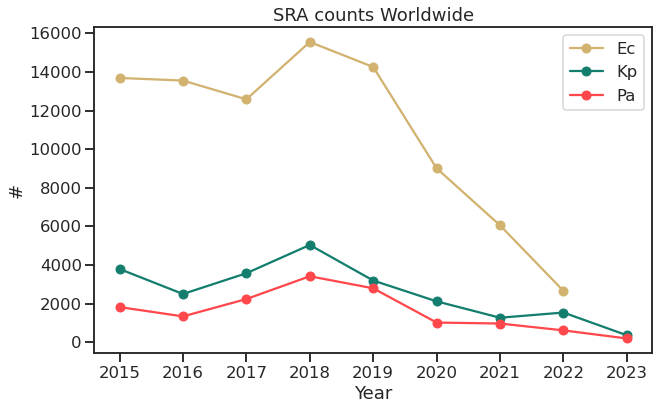

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(ww_y['Year'], ww_y['Ec'], marker='o', label='Ec', color='#d1b26f')
plt.plot(ww_y['Year'], ww_y['Kp'], marker='o', label='Kp', color='#137e6d')
plt.plot(ww_y['Year'], ww_y['Pa'], marker='o', label='Pa', color='#ff474c')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('#')
plt.title('SRA counts Worldwide')

# add legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

plt.savefig('../../out/figures/counts_sra.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/counts_sra.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [44]:
# count samples in Germany per year and merge df
# ecoli samples in Germany per year
ec_de_y = ec_filtered[ec_filtered['geo_loc_name_country'] == 'Germany'].groupby(['Year']).size()
ec_de_y = ec_de_y.reset_index()
ec_de_y.columns = ['Year', 'Ec']

# kpenumoniae samples in Germany per year
kp_de_y = kp_filtered[kp_filtered['geo_loc_name_country'] == 'Germany'].groupby(['Year']).size()
kp_de_y = kp_de_y.reset_index()
kp_de_y.columns = ['Year', 'Kp']

# paeruginosa samples in Germany per year
pa_de_y = pa_filtered[pa_filtered['geo_loc_name_country'] == 'Germany'].groupby(['Year']).size()
pa_de_y = pa_de_y.reset_index()
pa_de_y.columns = ['Year', 'Pa']

# merge counts per species per de per y
de_y = pd.merge(pd.merge(ec_de_y, kp_de_y, on='Year', how='outer'), pa_de_y, on='Year', how='outer')

In [45]:
de_y

,Year,Ec,Kp,Pa
0,2015.0,615,53,195
1,2016.0,361,38,476
2,2017.0,329,36,99
3,2018.0,197,25,41
4,2019.0,264,102,7
5,2020.0,462,42,13
6,2021.0,157,41,19
7,2022.0,16,217,13


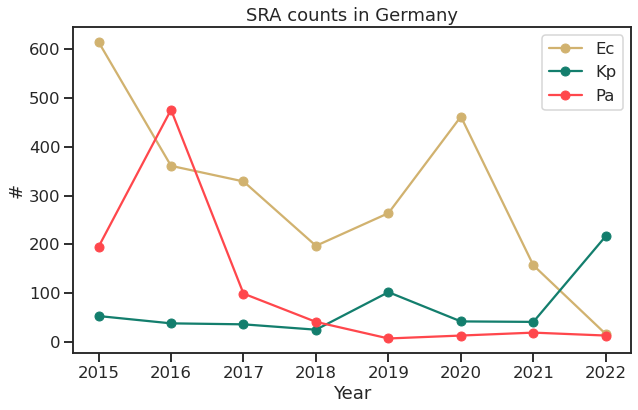

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(de_y['Year'], de_y['Ec'], marker='o', label='Ec', color='#d1b26f')
plt.plot(de_y['Year'], de_y['Kp'], marker='o', label='Kp', color='#137e6d')
plt.plot(de_y['Year'], de_y['Pa'], marker='o', label='Pa', color='#ff474c')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('#')
plt.title('SRA counts in Germany')

# add legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

In [47]:
ec_filtered.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,Strain,geo_loc_name_country,geo_loc_name_country_continent,Isolation_source,BioSampleModel,Collection_Date,geo_loc_name,Year,Month,Date
0,SRR1785158,WGS,453.0,378937167.0,PRJNA218110,SAMN03295013,220446233.0,EDLB-CDC,public,"sra,run.zq,fastq,realign,wgmlst_sig",...,PNUSAE000227,USA,North America,stool,Pathogen.cl,2015-01,USA,2015.0,2015-01,NaT
1,SRR1793818,WGS,487.0,581515407.0,PRJNA218110,SAMN03332160,369186042.0,EDLB-CDC,public,"realign,run.zq,fastq,sra,wgmlst_sig",...,PNUSAE000230,USA,North America,stool,Pathogen.cl,2015-01,USA,2015.0,2015-01,NaT
2,SRR1793819,WGS,488.0,342860170.0,PRJNA218110,SAMN03332161,227852779.0,EDLB-CDC,public,"realign,fastq,wgmlst_sig,sra,run.zq",...,PNUSAE000231,USA,North America,stool,Pathogen.cl,2015-01,USA,2015.0,2015-01,NaT
3,SRR2989995,WGS,492.0,697348889.0,PRJNA218110,SAMN04191668,452216926.0,EDLB-CDC,public,"realign,wgmlst_sig,fastq,sra,run.zq",...,PNUSAE001592,USA,North America,stool,pathogen.cl,2015-08,USA,2015.0,2015-08,NaT
4,SRR2990000,WGS,488.0,913594925.0,PRJNA218110,SAMN04191669,594261503.0,EDLB-CDC,public,"realign,sra,run.zq,fastq,wgmlst_sig",...,PNUSAE001593,USA,North America,stool,pathogen.cl,2015-08,USA,2015.0,2015-08,NaT


In [73]:
# counts per country per each species
counts_ec = ec_filtered.groupby(['Year', 'geo_loc_name_country']).size().reset_index(name="Ec")
counts_kp = kp_filtered.groupby(['Year', 'geo_loc_name_country']).size().reset_index(name="Kp")
counts_pa = pa_filtered.groupby(['Year', 'geo_loc_name_country']).size().reset_index(name="Pa")

# merge
counts_merged_y = pd.merge(pd.merge(counts_ec, counts_kp, on=['Year', 'geo_loc_name_country'], how='outer'), counts_pa, on=['Year', 'geo_loc_name_country'], how='outer').fillna(0)

In [74]:
counts_merged_y

,Year,geo_loc_name_country,Ec,Kp,Pa
0,2015.0,Argentina,15.0,0.0,0.0
1,2015.0,Australia,390.0,114.0,9.0
2,2015.0,Austria,27.0,0.0,0.0
3,2015.0,Bangladesh,162.0,73.0,0.0
4,2015.0,Belgium,147.0,0.0,0.0
...,...,...,...,...,...
376,2018.0,Serbia,0.0,0.0,187.0
377,2019.0,Colombia,0.0,0.0,78.0
378,2019.0,Saudi Arabia,0.0,0.0,68.0
379,2020.0,Saudi Arabia,0.0,0.0,6.0


In [52]:
ww_y.sum()

Year    18171.0
Ec      87371.0
Kp      23337.0
Pa      14345.0
dtype: float64

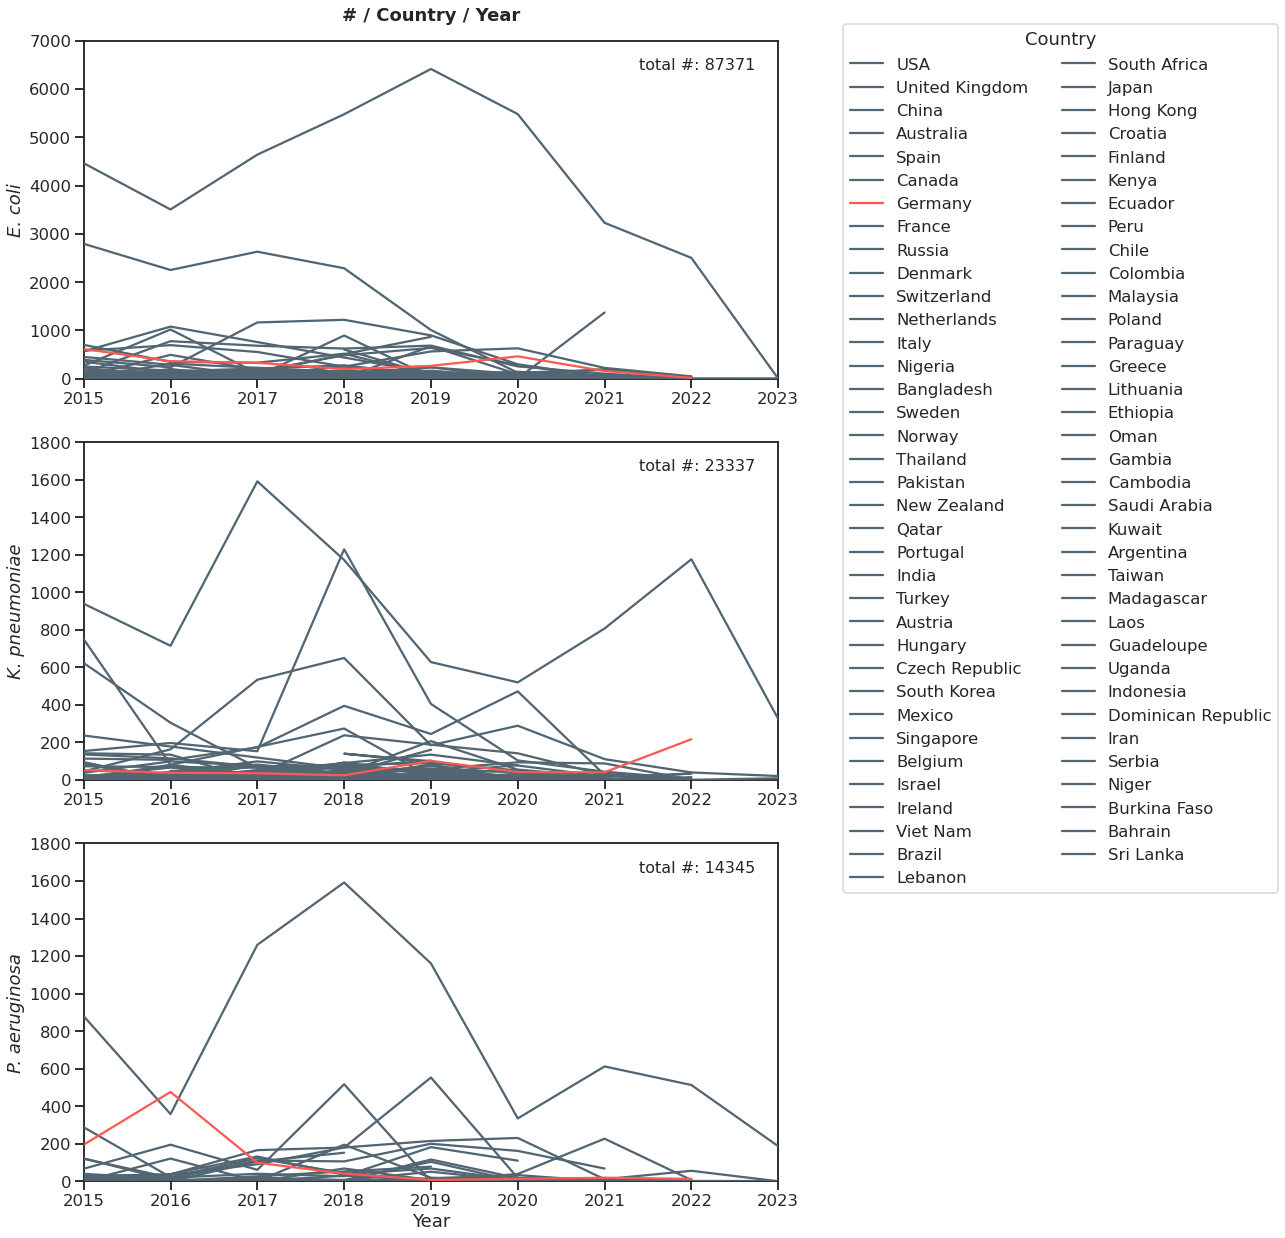

In [76]:
# Plot the data for each species separately using line plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# zorder will bring the line from Germany to the front. The higher the value, the closer the object is to the front
# Plot for Ec
for country, group in counts_merged_y.groupby('geo_loc_name_country'):
    if country == 'Germany':
        axes[0].plot(group['Year'], group['Ec'], label=country, color='#fc5a50', zorder=10)
    else:
        axes[0].plot(group['Year'], group['Ec'], label=country, color='#516572', zorder=5)

axes[0].set_title('# / Country / Year', pad=20, fontweight='bold')
#axes[0].set_xlabel('Year')
axes[0].set_ylabel('E. coli', fontstyle='italic')
axes[0].set_ylim(bottom=0, top=7000)
axes[0].set_xlim(left=counts_merged_y['Year'].min(), right=counts_merged_y['Year'].max())

# Plot for Kp
for country, group in counts_merged_y.groupby('geo_loc_name_country'):
    if country == 'Germany':
        axes[1].plot(group['Year'], group['Kp'], label=country, color='#fc5a50', zorder=10)
    else:
        axes[1].plot(group['Year'], group['Kp'], label=country, color='#516572', zorder=5)

#axes[1].set_xlabel('Year')
axes[1].set_ylabel('K. pneumoniae', fontstyle='italic')
axes[1].set_ylim(bottom=0, top=1800)
axes[1].set_xlim(left=counts_merged_y['Year'].min(), right=counts_merged_y['Year'].max())

# Plot for Pa
for country, group in counts_merged_y.groupby('geo_loc_name_country'):
    if country == 'Germany':
        axes[2].plot(group['Year'], group['Pa'], label=country, color='#fc5a50', zorder=10)
    else:
        axes[2].plot(group['Year'], group['Pa'], label=country, color='#516572', zorder=5)

axes[2].set_xlabel('Year')
axes[2].set_ylabel('P. aeruginosa', fontstyle='italic')
axes[2].set_ylim(bottom=0, top=1800)
axes[2].set_xlim(left=counts_merged_y['Year'].min(), right=counts_merged_y['Year'].max())

# Add total counts to each subplot
axes[0].text(0.80, 0.95, 'total #: 87371', transform=axes[0].transAxes, fontsize=16, va='top')
axes[1].text(0.80, 0.95, 'total #: 23337', transform=axes[1].transAxes, fontsize=16, va='top')
axes[2].text(0.80, 0.95, 'total #: 14345', transform=axes[2].transAxes, fontsize=16, va='top')

# Create a single legend for all subplots, sorted by country total counts in descending order
handles, labels = [], []
for country in sorted_countries:
    for handle, label in zip(*axes[0].get_legend_handles_labels()):
        if label == country:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, title='Country', bbox_to_anchor=(1, 0.965), loc='upper left', ncol=2, facecolor='white')

# Adjust subplot padding
plt.tight_layout(pad=2)

plt.savefig('../../out/figures/counts_country_year_sra.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/counts_country_year_sra.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [77]:
# counts per country per each species per date
counts_ec = ec_filtered.groupby(['Date', 'geo_loc_name_country']).size().reset_index(name="Ec")
counts_kp = kp_filtered.groupby(['Date', 'geo_loc_name_country']).size().reset_index(name="Kp")
counts_pa = pa_filtered.groupby(['Date', 'geo_loc_name_country']).size().reset_index(name="Pa")

# merge
counts_merged_d = pd.merge(pd.merge(counts_ec, counts_kp, on=['Date', 'geo_loc_name_country'], how='outer'), counts_pa, on=['Date', 'geo_loc_name_country'], how='outer').fillna(0)

In [78]:
counts_merged_d

,Date,geo_loc_name_country,Ec,Kp,Pa
0,2015-01-01,Canada,32.0,0.0,0.0
1,2015-01-01,China,1.0,0.0,0.0
2,2015-01-01,Poland,17.0,0.0,0.0
3,2015-01-01,United Kingdom,2.0,1.0,20.0
4,2015-01-01,Viet Nam,2.0,0.0,0.0
...,...,...,...,...,...
11563,2023-04-12,USA,0.0,0.0,1.0
11564,2023-04-14,USA,0.0,0.0,1.0
11565,2023-04-18,USA,0.0,0.0,2.0
11566,2023-04-24,USA,0.0,0.0,1.0


In [79]:
counts_merged_d[['Ec', 'Kp', 'Pa']].sum()

Ec    31759.0
Kp     9428.0
Pa     5058.0
dtype: float64

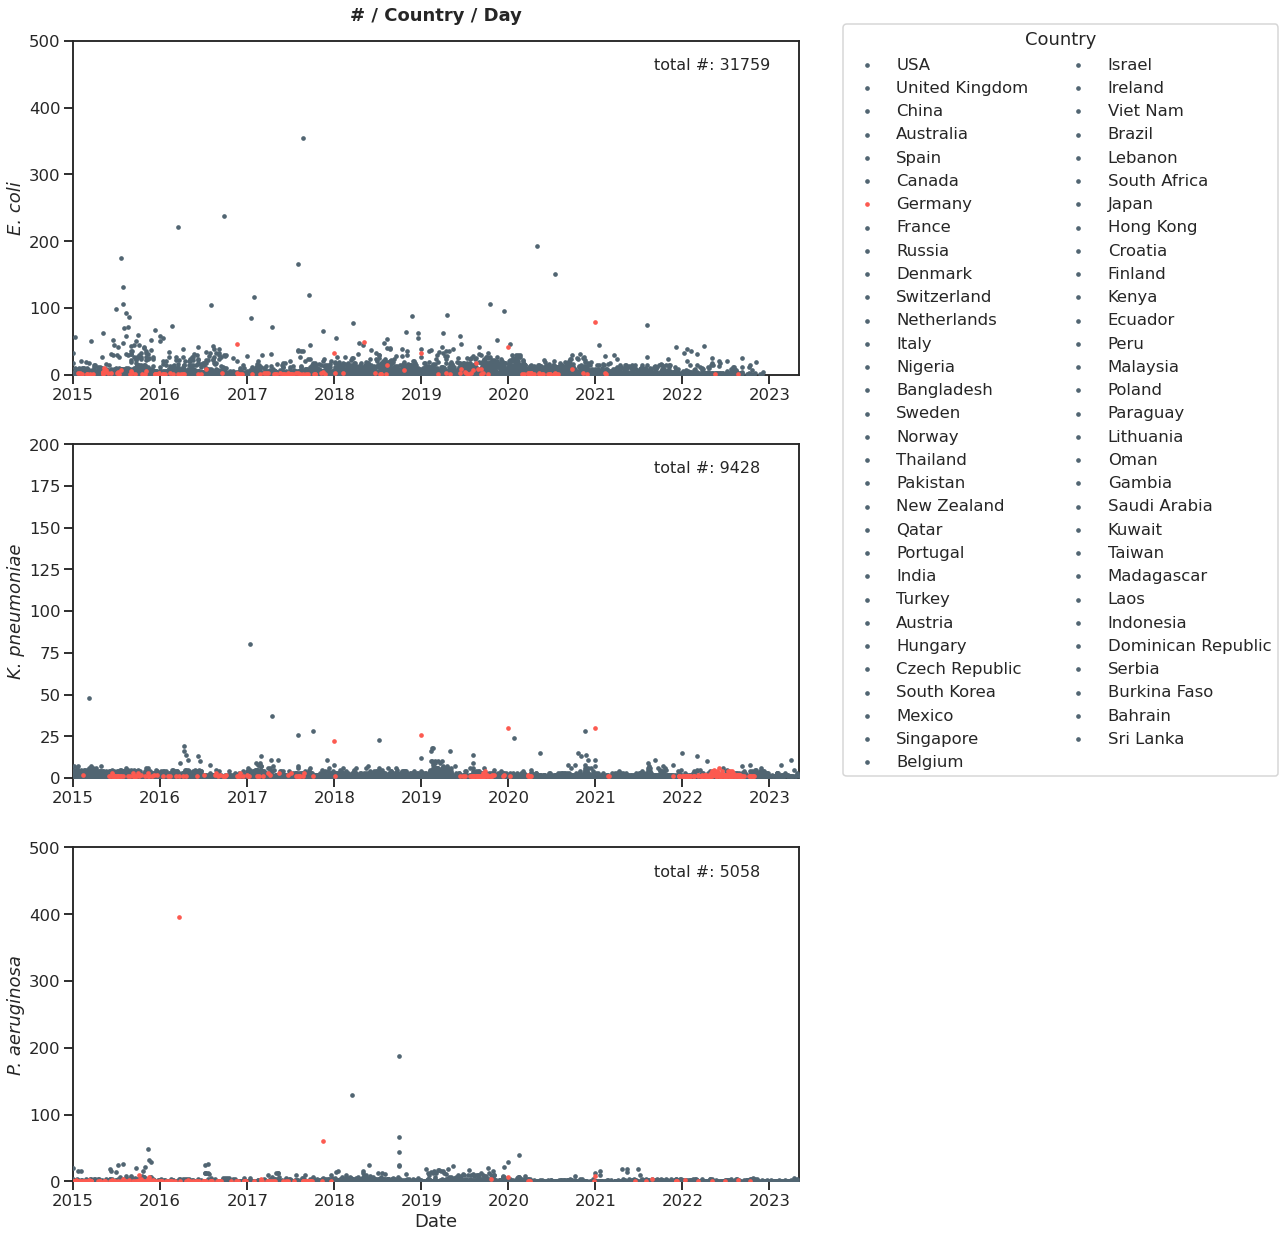

In [80]:
# Plot the data for each species separately using line plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# zorder will bring the line from Germany to the front. The higher the value, the closer the object is to the front
# Plot for Ec
for country, group in counts_merged_d.groupby('geo_loc_name_country'):
    color = '#fc5a50' if country == 'Germany' else '#516572'
    zorder = 10 if country == 'Germany' else 5
    nonzero_mask = group['Ec'] > 0
    axes[0].scatter(group['Date'][nonzero_mask], group['Ec'][nonzero_mask], label=country, color=color, zorder=zorder, marker='o', s=10)

axes[0].set_title('# / Country / Day', pad=20, fontweight='bold')
#axes[0].set_xlabel('Date')
axes[0].set_ylabel('E. coli', fontstyle='italic')
axes[0].set_ylim(bottom=0, top=500)
axes[0].set_xlim(left=counts_merged_d['Date'].min(), right=counts_merged_d['Date'].max())

# Plot for Kp
for country, group in counts_merged_d.groupby('geo_loc_name_country'):
    color = '#fc5a50' if country == 'Germany' else '#516572'
    zorder = 10 if country == 'Germany' else 5
    nonzero_mask = group['Kp'] > 0
    axes[1].scatter(group['Date'][nonzero_mask], group['Kp'][nonzero_mask], label=country, color=color, zorder=zorder, marker='o', s=10)

#axes[1].set_xlabel('Date')
axes[1].set_ylabel('K. pneumoniae', fontstyle='italic')
axes[1].set_ylim(bottom=0, top=200)
axes[1].set_xlim(left=counts_merged_d['Date'].min(), right=counts_merged_d['Date'].max())

# Plot for Pa
for country, group in counts_merged_d.groupby('geo_loc_name_country'):
    color = '#fc5a50' if country == 'Germany' else '#516572'
    zorder = 10 if country == 'Germany' else 5
    nonzero_mask = group['Pa'] > 0
    axes[2].scatter(group['Date'][nonzero_mask], group['Pa'][nonzero_mask], label=country, color=color, zorder=zorder, marker='o', s=10)

axes[2].set_xlabel('Date')
axes[2].set_ylabel('P. aeruginosa', fontstyle='italic')
axes[2].set_ylim(bottom=0, top=500)
axes[2].set_xlim(left=counts_merged_d['Date'].min(), right=counts_merged_d['Date'].max())

# Add total counts to each subplot
axes[0].text(0.80, 0.95, 'total #: 31759', transform=axes[0].transAxes, fontsize=16, va='top')
axes[1].text(0.80, 0.95, 'total #: 9428', transform=axes[1].transAxes, fontsize=16, va='top')
axes[2].text(0.80, 0.95, 'total #: 5058', transform=axes[2].transAxes, fontsize=16, va='top')

# Create a single legend for all subplots, sorted by country total counts in descending order
handles, labels = [], []
for country in sorted_countries:
    for handle, label in zip(*axes[0].get_legend_handles_labels()):
        if label == country:
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, title='Country', bbox_to_anchor=(1, 0.965), loc='upper left', ncol=2, facecolor='white')

# Adjust subplot padding
plt.tight_layout(pad=2)

plt.savefig('../../out/figures/counts_country_day_sra.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/counts_country_day_sra.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [82]:
df_melted

,Date,Category,Count
0,2015-01-22,Ec,2.0
1,2015-01-28,Ec,2.0
2,2015-02-09,Ec,1.0
3,2015-02-27,Ec,1.0
4,2015-03-02,Ec,1.0
...,...,...,...
1477,2021-12-10,Pa,1.0
1478,2022-01-11,Pa,2.0
1479,2022-03-08,Pa,1.0
1480,2022-05-05,Pa,1.0


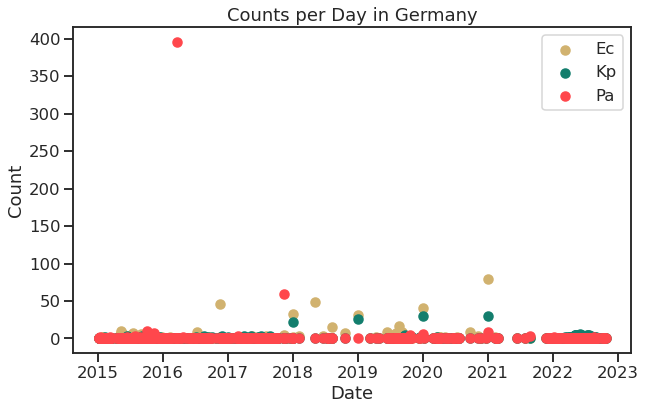

In [89]:
# counts / day / germany
df_germany = counts_merged_d[counts_merged_d['geo_loc_name_country'] == 'Germany']

# Melt the DataFrame to combine 'Ec', 'Kp', and 'Pa' into a single column 'Category'
df_melted = df_germany.melt(id_vars=['Date'], value_vars=['Ec', 'Kp', 'Pa'], var_name='Category', value_name='Count')

# Create a dictionary to map categories to colors
category_colors = {'Ec': '#d1b26f', 'Kp': '#137e6d', 'Pa': '#ff474c'}

# Plot the data with points
plt.figure(figsize=(10, 6))
for category, color in category_colors.items():
    category_data = df_melted[df_melted['Category'] == category]
    plt.scatter(category_data['Date'], category_data['Count'], marker='o', label=category, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts per Day in Germany')

# Add legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

plt.savefig('../../out/figures/counts_DE_day_sra.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/counts_DE_day_sra.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

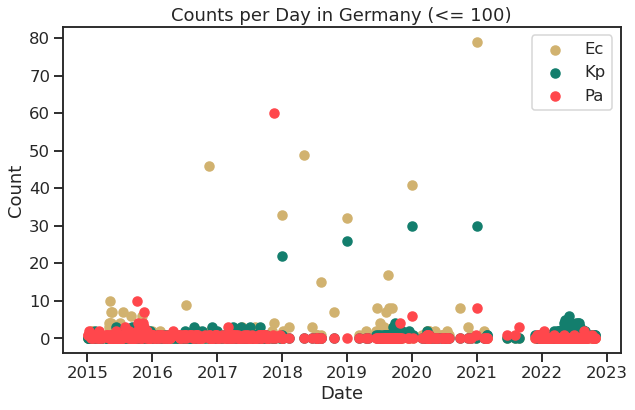

In [88]:
# Filter data to ignore counts greater than 100
df_filtered = df_melted[df_melted['Count'] <= 100]

# Plot the data with points
plt.figure(figsize=(10, 6))
for category, color in category_colors.items():
    category_data = df_filtered[df_filtered['Category'] == category]
    plt.scatter(category_data['Date'], category_data['Count'], marker='o', label=category, color=color)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Counts per Day in Germany (<= 100)')

# Add legend
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('white')

plt.savefig('../../out/figures/counts_DE_day_sra_zoomed.png',
            dpi=300,
            bbox_inches='tight',
            transparent=True)
plt.savefig('../../out/figures/counts_DE_day_sra_zoomed.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [94]:
filtered_data = pa_filtered[(pa_filtered['geo_loc_name_country'] == "Germany") & (pa_filtered['Year'] == 2016)]
counts_by_center = filtered_data['Center Name'].value_counts()
print(counts_by_center)


ZOOLOGICAL INSTITUTE, KIEL UNIVERSITY                                396
UNIVERSITY HOSPITAL, GOETHE UNIVERSITY FRANKFURT AM MAIN, GERMANY     41
ZOOLOGICAL INSTITUTE, CHRISTIAN-ALBRECHTS-UNIVERSITY KIEL             30
INSTITUTE OF MEDICAL MICROBIOLOGY, IMMUNOLOGY AND PARASITOLOGY         7
UNIVERSITAETSKLINIKUM ERLANGEN                                         2
Name: Center Name, dtype: int64


In [93]:
pa_filtered[(pa_filtered['geo_loc_name_country'] == "Germany") & (pa_filtered['Year'] == 2016)]

,Run,Assay Type,BioSample,Center Name,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,Experiment,Instrument,...,Library Name,Collection_Date,geo_loc_name_country,geo_loc_name_country_continent,Isolation_source,BioSampleModel,geo_loc_name,Year,Month,Date
572,SRR15064933,WGS,SAMN20110666,"UNIVERSITY HOSPITAL, GOETHE UNIVERSITY FRANKFU...",public,"run.zq,sra,fastq","s3,gs,ncbi","s3.us-east-1,gs.US,ncbi.public",SRX11375116,Illumina NovaSeq 6000,...,A_006,2016,Germany,Europe,blood culture,"Microbe\, viral or environmental",Germany: State of Hesse,2016.0,NaT,NaT
573,SRR15064940,WGS,SAMN20110675,"UNIVERSITY HOSPITAL, GOETHE UNIVERSITY FRANKFU...",public,"sra,fastq,run.zq","ncbi,gs,s3","ncbi.public,gs.US,s3.us-east-1",SRX11375109,Illumina NovaSeq 6000,...,A_015,2016,Germany,Europe,rectal swab,"Microbe\, viral or environmental",Germany: State of Hesse,2016.0,NaT,NaT
574,SRR15064942,WGS,SAMN20110673,"UNIVERSITY HOSPITAL, GOETHE UNIVERSITY FRANKFU...",public,"sra,run.zq,fastq","gs,s3,ncbi","ncbi.public,s3.us-east-1,gs.US",SRX11375107,Illumina NovaSeq 6000,...,A_013,2016,Germany,Europe,sputum,"Microbe\, viral or environmental",Germany: State of Hesse,2016.0,NaT,NaT
4780,SRR21053622,WGS,SAMN30313579,"UNIVERSITY HOSPITAL, GOETHE UNIVERSITY FRANKFU...",public,"fastq,sra,run.zq","s3,ncbi,gs","ncbi.public,gs.US,s3.us-east-1",SRX17068905,Illumina NovaSeq 6000,...,F3355,2016-06-14,Germany,Europe,NaN,"Microbe\, viral or environmental",Germany: Frankfurt am Main,2016.0,NaT,2016-06-14 00:00:00
4781,SRR21053623,WGS,SAMN30313578,"UNIVERSITY HOSPITAL, GOETHE UNIVERSITY FRANKFU...",public,"run.zq,sra,fastq","gs,s3,ncbi","ncbi.public,s3.us-east-1,gs.US",SRX17068904,Illumina NovaSeq 6000,...,F3341,2016-06-03,Germany,Europe,NaN,"Microbe\, viral or environmental",Germany: Frankfurt am Main,2016.0,NaT,2016-06-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12716,SRR19537815,WGS,SAMN28859614,"INSTITUTE OF MEDICAL MICROBIOLOGY, IMMUNOLOGY ...",public,"sra,fastq,run.zq","gs,s3,ncbi","gs.US,ncbi.public,s3.us-east-1",SRX15589895,Illumina MiSeq,...,6,2016,Germany,Europe,clinical,Pathogen.cl,Germany,2016.0,NaN,NaN
12731,SRR19537847,WGS,SAMN28859620,"INSTITUTE OF MEDICAL MICROBIOLOGY, IMMUNOLOGY ...",public,"run.zq,fastq,sra","ncbi,s3,gs","s3.us-east-1,gs.US,ncbi.public",SRX15589863,Illumina MiSeq,...,12,2016,Germany,Europe,clinical,Pathogen.cl,Germany,2016.0,NaN,NaN
12732,SRR19537848,WGS,SAMN28859619,"INSTITUTE OF MEDICAL MICROBIOLOGY, IMMUNOLOGY ...",public,"sra,fastq,run.zq","ncbi,s3,gs","gs.US,s3.us-east-1,ncbi.public",SRX15589862,Illumina MiSeq,...,11,2016,Germany,Europe,clinical,Pathogen.cl,Germany,2016.0,NaN,NaN
13348,SRR21135954,WGS,SAMN30403695,UNIVERSITAETSKLINIKUM ERLANGEN,public,"sra,fastq,run.zq","s3,gs,ncbi","ncbi.public,s3.us-east-1,gs.US",SRX17148292,NextSeq 550,...,KR119,2016,Germany,Europe,wound swab [SNOMED:258531008],Pathogen.cl,Germany:Regensburg,2016.0,NaN,NaN
